# Logistic Regression

email: saideeptalari@gmail.com

$$0\leq h_\theta(x) \leq 1$$


$$h_\theta(x) = g(\theta^TX)$$


where$$ g(z) = \frac{1}{1+e^{-z}}$$

$g(z)$ is called Sigmoid Function or Logistic Function

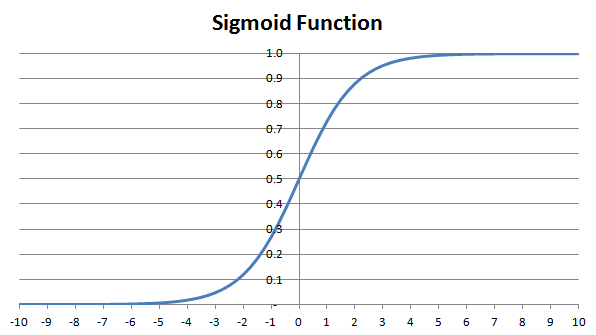

In [1]:
from IPython.display import Image
Image('logistic-regression-1.png')

$$h_\theta(x) = \frac{1}{1+e^{-\theta^TX}}$$

$h_\theta(x)$ = estimated probability that $y=1$ on input $x$

$\therefore$ $\\$ $h_\theta(x) = P(y=1|x;\theta) $

$\implies P(y=0|x;\theta)+P(y=1|x;\theta)=1$

$\\$ $h_\theta(x)=g(\theta^TX)\geq 0.5$ $\\$ whenever $\\$ $\theta^TX \geq 0$

## Decision Boundary

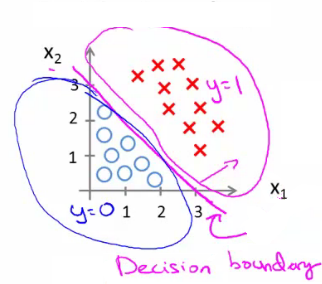

In [2]:
Image('logistic-regression-3.png')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
X = np.array([1,1.5,2.2,3.5,4.1,5.6,6.6,7.3,7.8,8.5])
X = np.c_[X]

In [5]:
Y = np.array([0,0,0,0,0,1,1,1,1,1])

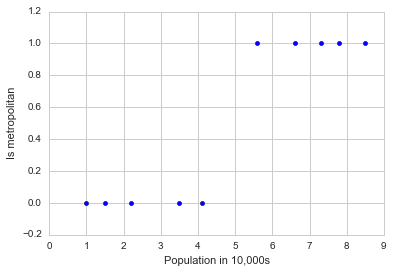

In [6]:
plt.scatter(X,Y)
plt.xlabel('Population in 10,000s')
plt.ylabel('Is metropolitan')

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
model = LogisticRegression()
model.fit(X,Y)
model.score(X,Y)

0.80000000000000004

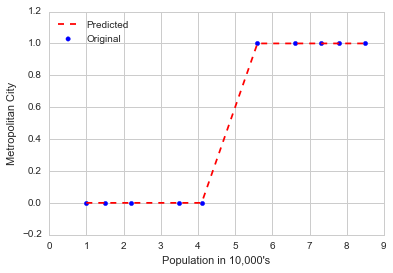

In [9]:
plt.scatter(X,Y,color='blue',label='Original')
plt.plot(X,Y,'r--',label='Predicted')
plt.legend(loc='upper left')
plt.xlabel("Population in 10,000's")
plt.ylabel('Metropolitan City')

In [10]:
model.intercept_

array([-1.23446274])

In [11]:
model.coef_

array([[ 0.38572316]])

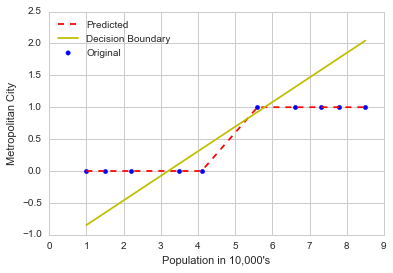

In [12]:
y = model.intercept_+model.coef_*X
plt.scatter(X,Y,color='blue',label='Original')
plt.plot(X,Y,'r--',label='Predicted')
plt.plot(X,y,'y-',label='Decision Boundary')
plt.legend(loc='upper left')
plt.xlabel("Population in 10,000's")
plt.ylabel('Metropolitan City')

(-0.2, 1.2)

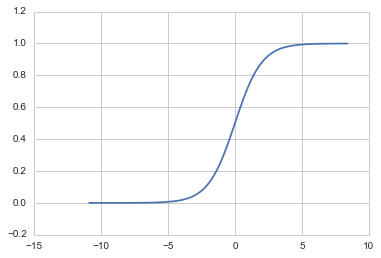

In [13]:
xx = np.c_[np.linspace(-25,25,100)]
y = model.intercept_+model.coef_*xx
yy = 1/(1+np.e**(-y))
plt.plot(y,yy)
plt.ylim(-0.2,1.2)

## Cost Function

Like Linear Regression we can not have the same cost function linearly but we can simplify it later. 
But for now the cost function for logistic regression is:

$$Cost(h_\theta(x),y)= -log(h_\theta(x)) if y=1$$
$\\$ $\\$ $$= -log(1-h_\theta(x)) if y=0$$

Simplifying:

$$Cost(h_\theta(x),y) = -y log(h_\theta(x)) - [(1-y)log(1-h_\theta(x))]$$

where

$$h_\theta(x) = \theta^TX$$

Therefore

$$J(\theta) = \frac{1}{m}\sum_{i=1}^m[-y log(h_\theta(x)) - [(1-y)log(1-h_\theta(x))]]$$

## Gradient Descent

**Repeat {**

$$\theta_j = \theta_j-\alpha \frac{\partial}{\partial \theta_j}J(\theta)$$

**}** (simultaneously update all \theta_j)

On solving the partial differentiation we get

**Repeat {**

$$\theta_j = \theta_j - \alpha \sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}$$

**}** (simultaneously update all $\theta_j$)

It is similar to gradient descent of linear regression.
The only difference is $h_\theta(x)$

$$h_\theta(x) = \frac{1}{1+e^{-\theta^TX}}$$

In [14]:
class GradientDescent(object):
    
    def __init__(self,alpha=0.1,n_iter=100,threshold=0.5):
        self.alpha = alpha
        self.n_iter = n_iter
        self.cost = []
        self.coefs = None
        self.threshold = threshold
        
    def fit(self,data,target):
        self.X = np.hstack((np.ones((data.shape[0],1)),data))
        self.Y = target
        m,n = self.X.shape
        self.n_features = n
        self.n_entries = m
        
    def run(self):
        theta = np.ones(self.n_features)
        xTrans = self.X.T
        for i in range(0, self.n_iter):
            hwx = 1/(1+np.e**(-np.dot(self.X, theta)))
            loss = hwx - self.Y
            m = self.n_entries
            cost = -(1/m)*(np.sum(Y*np.log(hwx)-((1-Y)*np.log(1-hwx))))
            self.cost.append(cost)
            gradient = np.dot(xTrans, loss) / m
            theta = theta - self.alpha * gradient
        self.coefs=theta
        return theta[0],theta[1:]
    
    def plot(self):
        plt.xlabel('No of Iterations')
        plt.ylabel('Cost function')
        return plt.plot(np.arange(1,self.n_iter+1),self.cost)
    
    def predict(self,data):
        data = np.hstack((np.ones((data.shape[0],1)),data))
        output = np.dot(data,self.coefs)
        output[output>=self.threshold] = 1
        output[output<self.threshold]= 0
        return output
    
    def score(self,data,target):
        predicted = self.predict(data)
        true = target
        return 1-(np.sum((true-predicted)**2)/np.sum((true-true.mean())**2))

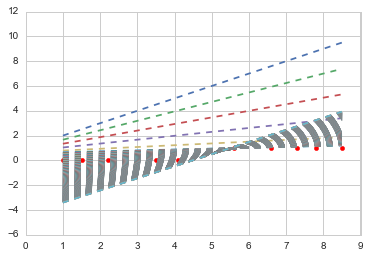

In [15]:
plt.scatter(X,Y,color='r')
for i in range(300):
    gd = GradientDescent(alpha=0.2,n_iter=i)
    gd.fit(X,Y)
    coefs = gd.run()

    plt.plot(X,coefs[0]+coefs[1]*X,'--')

In [16]:
#r-squared score
print "Gradient Descent: ",gd.score(X,Y)
print "Linear model: ",model.score(X,Y)

Gradient Descent:  1.0
Linear model:  0.8
